#PROYECTO FINAL

Segunda Entrega

ANDRADE-ALBERTINI


##COMENZAMOS CON UN BREVE ANALISIS DE NUESTRO DATASET

Importamos las librerias

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sm

Nos conectamos al DRIVE

In [4]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Leemos el nuestro dataset (credit_risk_dataset.csv)


In [6]:
%cd '/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/3_TERCER_ENTREGA/TERCER_ENTREGA2'
df1= pd.read_csv('credit_risk_dataset.csv',sep=',')
df1

/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/3_TERCER_ENTREGA/TERCER_ENTREGA2


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Vemos la cantidad de filas y columnas

In [7]:
df1.shape

(32581, 12)

Vemos los nombres de las columnas

In [8]:
df1.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

Vemos los tipos de datos

In [9]:
df1.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Vemos los indices

In [10]:
df1.index

RangeIndex(start=0, stop=32581, step=1)

Vemos la informacion del DataFrame

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Vemos los datos estadisticos del DataFrame

In [12]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Seleccionamos una columna

In [13]:
df1['loan_intent'].head()

0     PERSONAL
1    EDUCATION
2      MEDICAL
3      MEDICAL
4      MEDICAL
Name: loan_intent, dtype: object

Grafico de barras, procentaje por Motivo de solicitud del Prestamo

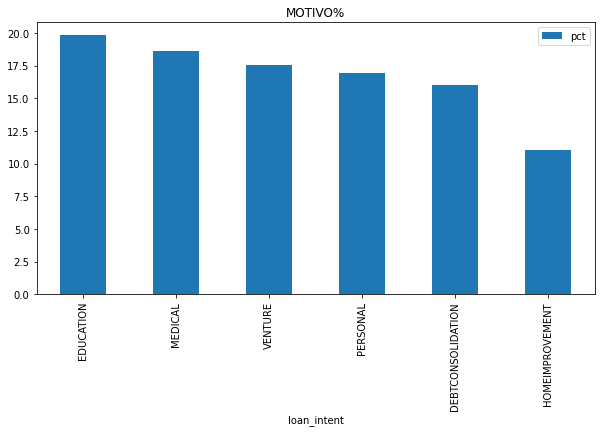

In [14]:
df2 = df1.groupby('loan_intent').size().sort_values(ascending=False)
df2 = pd.DataFrame(df2)
df2.columns = ['count']
df2['pct'] = round((df2['count'] / df2['count'].sum()) * 100, 2)
df2['pct'].plot.bar(figsize=(10,5), legend=True, title="MOTIVO%");

Otro ejemplo de Grafico

Text(0.5, 1.0, 'Histogram Prestamos por edad')

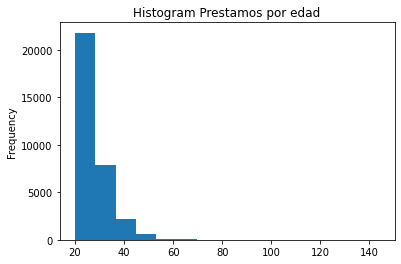

In [15]:
df1['person_age'].plot.hist(bins=15).set_title('Histogram Prestamos por edad')

El grafico arriba expuesto es un histograma que muestra la distribucion de la edad de los solicitantes, la variable que menciona la edad de las personas integrantes de la cartera. Se puede observar que es una distribucion muy asimétrica a la derecha, con casi la totalidad de los casos acumulados en los valores mas bajos.

#COMENZAMOS CON EL ANALISIS

## ABSTRACT

El análisis del perfil de riesgo de crédito de un cliente es un tema relevante para las entidades financieras, toda vez que identifica los factores generadores de riesgo de crédito (edad, género, capacidad de pago), además de contribuir en la implementación de Sistemas de Administración de Riesgo Crediticio. 

El dataset con el cual estaremos trabajando cuenta con informaciòn acerca de la cartera de clientes con préstamos activos de determinada entidad financiera y, en la columna loan_status muestra aquellos que han tenido un desempeno bueno (0) y aquellas que han mostrado incumplimiento en el pago de sus obligaciones (1). El presente trabajo buscará analizar si existe correlación con alguna de las variables incluidas en el dataset que pueda predecir en forma significativa la mencionada pd (probabilidad de default) de un cliente o bien si es posible determinar (combinando varias de las mencionadas variables) un perfil de cliente cuyo riesgo de incumplimiento se encuentra por encima de lo que la entidad esta dispuesta a tolerar. En caso de encontrar tal perfil, esta información se incorpora en los modelos de admisión de nuevos clientes  de la entidad, para mejorar los ratios de morosidad de la cartera, lo que permitirá -por un lado- exhibir en lo que respecta a su situación financiera, una mejora en lo que hace a la calidad de sus activos y -por otro lado, afectar positivamente en términos económicos el P&L de la entidad, al ser menor el monto que deberá previsionarse por malos créditos.
Tambien analizamos para el equipo de marketing, el rango etario al que hay que apuntar las nuevas campañas de de promocion.

## OBJETIVO

Encontrar perfil/es de cliente/s cuya probabilidad de default signifiquen un perjuicio para la calidad de la cartera y el P/L del banco, utilizando dicha información para optimizar los modelos de crédito existentes en la entidad.

## OBJETIVO 2

Encontrar perfil/es de cliente/s cuyo rango etario solicite mas prestamos y apuntar la campaña de marketing a esa muestra

## CONTEXTO COMERCIAL

Trabajamos para el equipo de riesgo de crédito en una entidad financiera que se dedica como actividad principal a la financiación de individuos.
Previo a la aprobación de cualquier crédito el mismo debe contar con el ok del modelo de score de la entidad.
Ante los importantes cambios que se han observado en la macroeconomía en los últimos tiempos, el modelo ha quedado desactualizado, con lo cual ha crecido el número de deudores cuyo cumplimiento no es satisfactorio. Es función del equipo de riesgo crediticio determinar qué mejoras deben realizarse para mejorar la calidad del proceso de aprobación de créditos.

## CONTEXTO COMERCIAL 2

Trabajamos para el equipo de marketing en una entidad financiera que se dedica como actividad principal a la financiación de individuos.
Tenemos como objetivo detectar las necesidades del mercado y poder atraerlos. 


## PROBLEMA COMERCIAL

Tal como se ha venido explicando en apartados anteriores, la pregunta a responder será:

¿Existen patrones particulares en los grupos de clientes que han mostrado incumplimientos en el último tiempo? ¿Cuáles?
¿Cual es el rango etario en el dataset que solicitaron mas prestamos?

## CONTEXTO ANALÍTICO

Se nos han proporcionado datos sobre los más de 32.000 clientes que posee la entidad (edad, ingreso, tipo de préstamo, monto, entre otras). 

Los siguientes cuentan con el campo loan_status que oficiará de etiqueta. Esto es, hará las veces de variable que nos diga cuáles de estos clientes son satisfactoriamente cumplidores y cuales han mostrado un deficitario desempeño en el pago de sus préstamos. Es por ello que trabajaremos en un entorno de Aprendizaje Supervisado, siendo el presente un trabajo de clasificación (etiquetas buen pagador -loan_status=0-; mal pagador -loan_status=1-).


## EXPLORATORY DATA ANALYSIS (EDA)

Buscaremos -en primer lugar- analizar si existe una diferencia significativa en el ingreso medio de los pagadores buenos (loan_status=0) y los pagadores malos (loan_status=1)

[Text(0, 0, '0'), Text(0, 0, '1')]

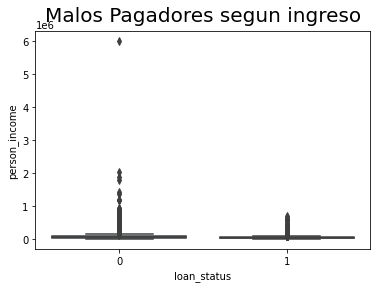

In [16]:
ax=sns.boxplot(x = 'loan_status', y = 'person_income', data = df1) 
plt.title("Malos Pagadores segun ingreso", fontsize=20, verticalalignment='bottom');
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

Del cuadro precedente se puede observar la necesidad de tratar los outliers ya que los pocos casos ganando muy por encima del resto no permiten que se vean claramente los datos de importancia como ser la media, mediana, cuartiles, etc.

In [17]:
df_alt = df1[df1['person_income'] <= 200000]

[Text(0, 0, '0'), Text(0, 0, '1')]

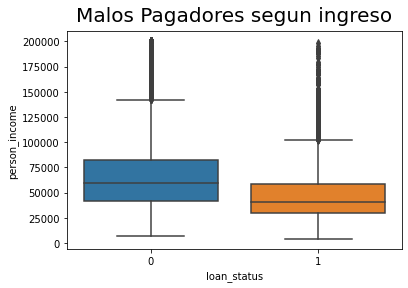

In [18]:
ax=sns.boxplot(x = 'loan_status', y = 'person_income', data = df_alt) 
plt.title("Malos Pagadores segun ingreso", fontsize=20, verticalalignment='bottom');
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

Se observa, en linea con lo que sería esperable a priori, que es significativamente menor el ingreso medio, y la distribución de primer y tercer cuartil en aquellos que no han podido/querido cumplir en forma regular con la obligación asumida. Se observa ademàs una fuerte concentración de casos que hacen que se encuentren muy proximos el 1er y 3er cuartil. 

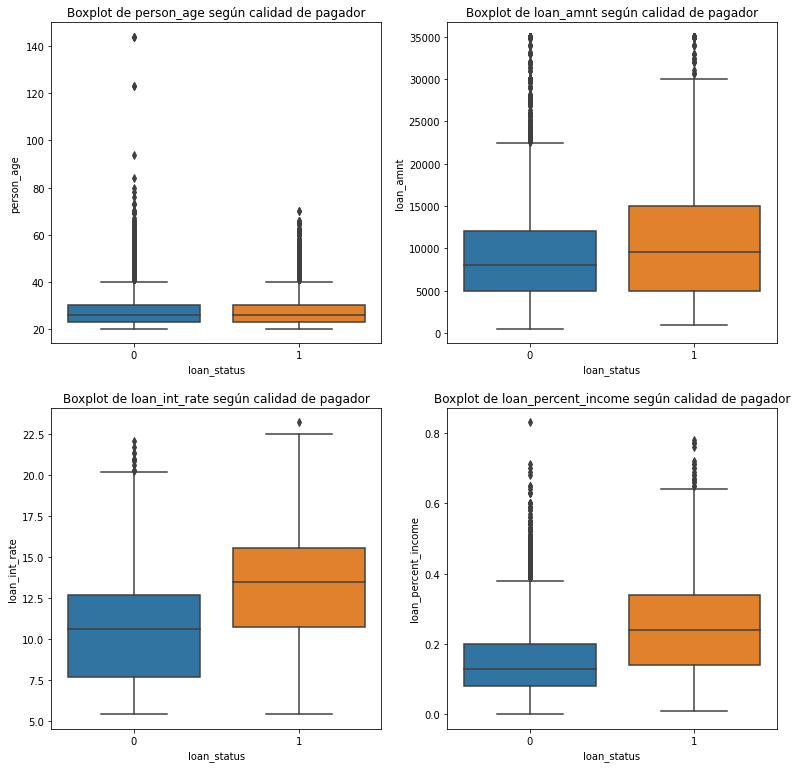

In [19]:
plt.figure(figsize=(13,13))
vars_to_plot = ['person_age','loan_amnt','loan_int_rate','loan_percent_income']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1) 
    sns.boxplot(x = 'loan_status', y= var, data = df1)
    title_string = "Boxplot de " + var + " según calidad de pagador"
    plt.ylabel(var)
    plt.title(title_string)

De los boxplots arriba expuestos parecería que hay mayor diferencia entre ambos grupos en lo que respecta a la tasa de interes (aquellos con mal comportamiento tienen en promedio una mayor tasa de interes, diferencia que se observa también en los 1er y 3er cuartil) y el porcentaje del ingreso que representa la cuota, que es también mayor en el grupo de cumplimiento deficiente.
En lo que respecta al monto del préstamo no pareciera haber diferencias significativas entre ambos grupos, al igual que en lo que a edades de los solicitantes respecta.

--------------------------------------------------------------------------------------------------------------------------

Otra forma, más numérica pero no tan visual, de entender la relación que las otras variables tienen con la calidad de pagador es analizar los indices de correlación, tal como haremos a continuación:

In [20]:
corr = df1.corr()
corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [21]:
corr    = df1.corr()
pos_cor = corr['loan_status'] >0
neg_cor = corr['loan_status'] <0
corr['loan_status'][pos_cor].sort_values(ascending = False).round(2)

loan_status            1.00
loan_percent_income    0.38
loan_int_rate          0.34
loan_amnt              0.11
Name: loan_status, dtype: float64

In [22]:
corr['loan_status'][neg_cor].sort_values().round(2)

person_income                -0.14
person_emp_length            -0.08
person_age                   -0.02
cb_person_cred_hist_length   -0.02
Name: loan_status, dtype: float64

Tal puede observarse en las dos últimas líneas son las variables que correlacionan más positivamente con loan_status el porcentaje del ingreso que representa el préstamo (loan_percent_income) y la tasa de interes (loan_int_rate), en tanto que no se observan variables que correlacionen fuertemente en forma negativa.

**2**

***Analisis para el Departamento de Marketing***
Para poder determinar a donde dirigir la campaña publiciaria y donde deben buscarse nuevos clientes.

Analisis de solicitudes de prestamos
En este caso vamos a analizar desde el area de marketing a que rango etario y que otras caracteristicas tendrian los nuevos clientes

In [23]:
%cd '/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/TERCER_ENTREGA/TERCER_ENTREGA2'
df2= pd.read_csv('credit_risk_dataset.csv',sep=',')
df2

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/TERCER_ENTREGA/TERCER_ENTREGA2'
/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/3_TERCER_ENTREGA/TERCER_ENTREGA2


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Vamos a analizar el rango etario de los solicitantes de los prestamos.
***Pregunta:***
En que rango etario se encuentra la mayor cantidad de prestamos solicitados?

Acotamos el rango a menores de 60 años

In [24]:
rango_etario_60 = df2[df2['person_age'] <= 60]
rango_etario=rango_etario_60.groupby('person_age').size()
rango_etario

person_age
20      15
21    1229
22    3633
23    3889
24    3549
25    3037
26    2477
27    2138
28    1854
29    1687
30    1316
31    1142
32     964
33     856
34     709
35     620
36     548
37     478
38     373
39     302
40     271
41     241
42     188
43     164
44     141
45     108
46      94
47      94
48      75
49      49
50      52
51      39
52      36
53      30
54      24
55      20
56      15
57      15
58      19
59       5
60      15
dtype: int64

Text(0, 0.5, 'PRESTAMOS')

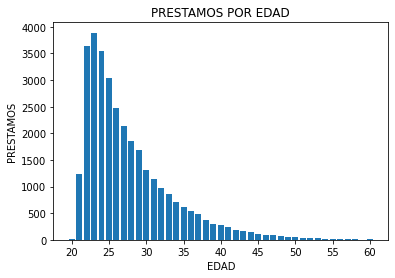

In [25]:
plt.bar(rango_etario.index,rango_etario.values)
plt.title('PRESTAMOS POR EDAD')
plt.xlabel('EDAD')
plt.ylabel('PRESTAMOS')

Text(0, 0.5, 'PRESTAMOS')

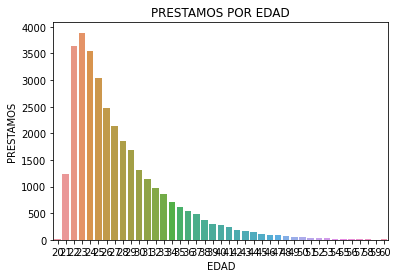

In [26]:
sns.barplot(x=rango_etario.index, y=rango_etario.values)
plt.title('PRESTAMOS POR EDAD')
plt.xlabel('EDAD')
plt.ylabel('PRESTAMOS')

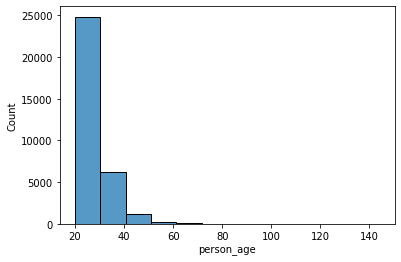

In [27]:
sns.histplot(data=df2, x="person_age", bins=12)
plt.show()

Del histograma precedente se observa una fortisima concentración de clientes entre 20-30 años, lo que permite sacar diversas conclusiones, entre las que podemos mencionar:

a- si se quiere analizar promociones destinadas a fidelizar clientes existentes serán más exitosas aquellas vinculadas con esa etapa (ej: créditos para primera vivienda, primer automovil, financiación de estudios, etc).

b- Por otra parte, si lo que se busca es equilibrar el gràfico incorporando a clientes de rangos etareos superiores deberá enfocarse la entidad en otorgar créditos para otros targets (ampliación de vivienda en el caso de 30- 40, 40-50, estudios mèdicos en el caso de los +50, solo por mencionar dos ejemplos).

Con los graficos realizados podemos ver que la edad con mayor solicitud de prestamos es 22, 23 y 24 años.

A continuacion vamos a analizar como se comportan los prestamos segun el motivo de los prestamos

In [28]:
motivo=df2.groupby('loan_intent').size()
motivo

loan_intent
DEBTCONSOLIDATION    5212
EDUCATION            6453
HOMEIMPROVEMENT      3605
MEDICAL              6071
PERSONAL             5521
VENTURE              5719
dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

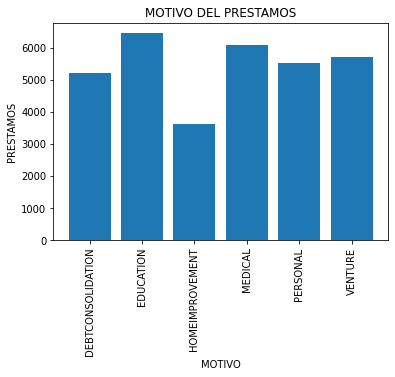

In [29]:
plt.bar(motivo.index,motivo.values)
plt.title('MOTIVO DEL PRESTAMOS')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

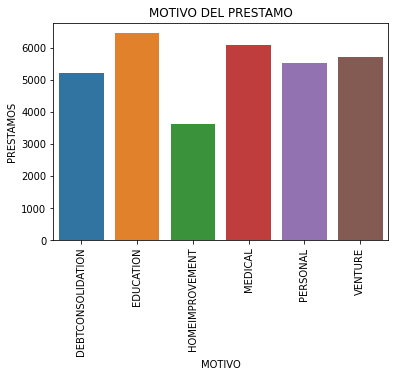

In [30]:
sns.barplot(x=motivo.index, y=motivo.values)
plt.title('MOTIVO DEL PRESTAMO')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

Como vemos en los graficos, podemos indicar que las solicitudes de prestamos son por motivos de Educacion y Medicos

Ahora vamos a analizar la situacion de vivienda de cada solicitante

In [31]:
vivienda=df2.groupby('person_home_ownership').size()
vivienda

person_home_ownership
MORTGAGE    13444
OTHER         107
OWN          2584
RENT        16446
dtype: int64

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

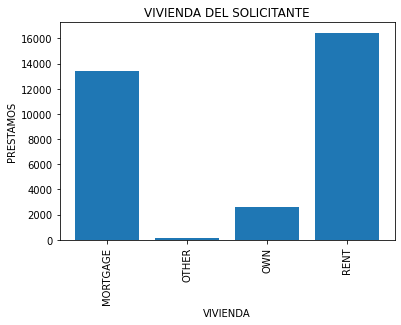

In [32]:
plt.bar(vivienda.index,vivienda.values)
plt.title('VIVIENDA DEL SOLICITANTE')
plt.xlabel('VIVIENDA')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

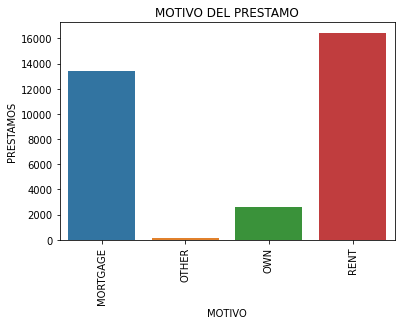

In [33]:
sns.barplot(x=vivienda.index, y=vivienda.values)
plt.title('MOTIVO DEL PRESTAMO')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

Con los graficos podemos identificar que la mayoria de los solicitantes alquilan o estan pagando hipotecas.

En conclusion podemos determinar que el rango etario al que hay que apuntar es de 22 a 24 años, los motivos principales son para Educacion y Medicina. Y a nivel vivienda este grupo es inquilino o esta pagando una hipoteca.

## Fase 1: Descubrimiento

In [34]:
df1.shape

(32581, 12)

Validamos a continuaciòn la existencia o no de datos nulos

In [35]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Se observa que las celdas que poseen datos nulos son las de antiguedad laboral (person_emp_length, con 895 nulos, representativos del 2.75% del total) y tasa de interes (loan_int_rate, con 3116 nulos, representativos del 9.57% del total). Ambos son datos flotantes (ver celda siguiente).

In [36]:
df1.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

A continuación vamos a chequear que la variable que buscamos pronosticar (loan_status) tenga solo variables 0 y 1

In [37]:
df1.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

Observamos que efectivamente hay solo 0 y 1, pero que se trata de un dataset desbalanceado, con muchos mas 0 que 1.

In [38]:
df1.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


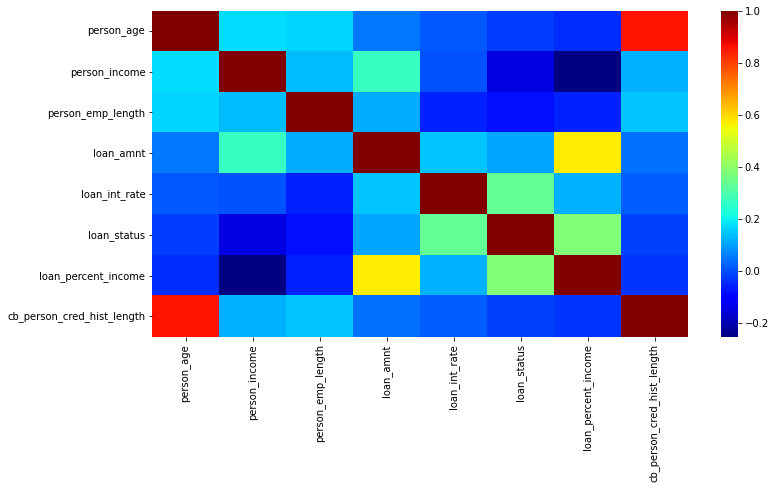

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),cmap='jet')

Se desprende del gràfico realizado que no hay fuertes correlaciones entre casi ninguna de las variables (solo la edad y el historial de crèdito lo hacen en forma significativa, siendo las variables con mayor correlaciòn directa con loan_status la tasa de interes y el % del ingreso que el crèdito significa. Ninguna de las variables es significativa en tèrminos de correlaciòn inversa.

## Fase 2: Estructuración

In [40]:
df2= df1.copy()
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Pr

In [41]:
debtconsolidation_median = df2[df2['loan_intent'] == 'DEBTCONSOLIDATION']['loan_int_rate'].median()
education_median = df2[df2['loan_intent'] == 'EDUCATION']['loan_int_rate'].median()
homeimprovement_median = df2[df2['loan_intent'] == 'HOMEIMPROVEMENT']['loan_int_rate'].median()
medical_median = df2[df2['loan_intent'] == 'MEDICAL']['loan_int_rate'].median()
personal_median = df2[df2['loan_intent'] == 'PERSONAL']['loan_int_rate'].median()
venture_median = df2[df2['loan_intent'] == 'VENTURE']['loan_int_rate'].median()

In [42]:
df2.loc[(df2[(df2['loan_intent'] == 'DEBTCONSOLIDATION') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'DEBTCONSOLIDATION']['loan_int_rate'].fillna(debtconsolidation_median)
df2.loc[(df2[(df2['loan_intent'] == 'EDUCATION') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'EDUCATION']['loan_int_rate'].fillna(education_median)
df2.loc[(df2[(df2['loan_intent'] == 'HOMEIMPROVEMENT') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'HOMEIMPROVEMENT']['loan_int_rate'].fillna(homeimprovement_median)
df2.loc[(df2[(df2['loan_intent'] == 'MEDICAL') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'MEDICAL']['loan_int_rate'].fillna(medical_median)
df2.loc[(df2[(df2['loan_intent'] == 'PERSONAL') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'PERSONAL']['loan_int_rate'].fillna(personal_median)
df2.loc[(df2[(df2['loan_intent'] == 'VENTURE') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'VENTURE']['loan_int_rate'].fillna(venture_median)


In [43]:
df2['person_emp_length'] = df2['person_emp_length'].fillna(df2['person_emp_length'].median())

In [44]:
df2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [45]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


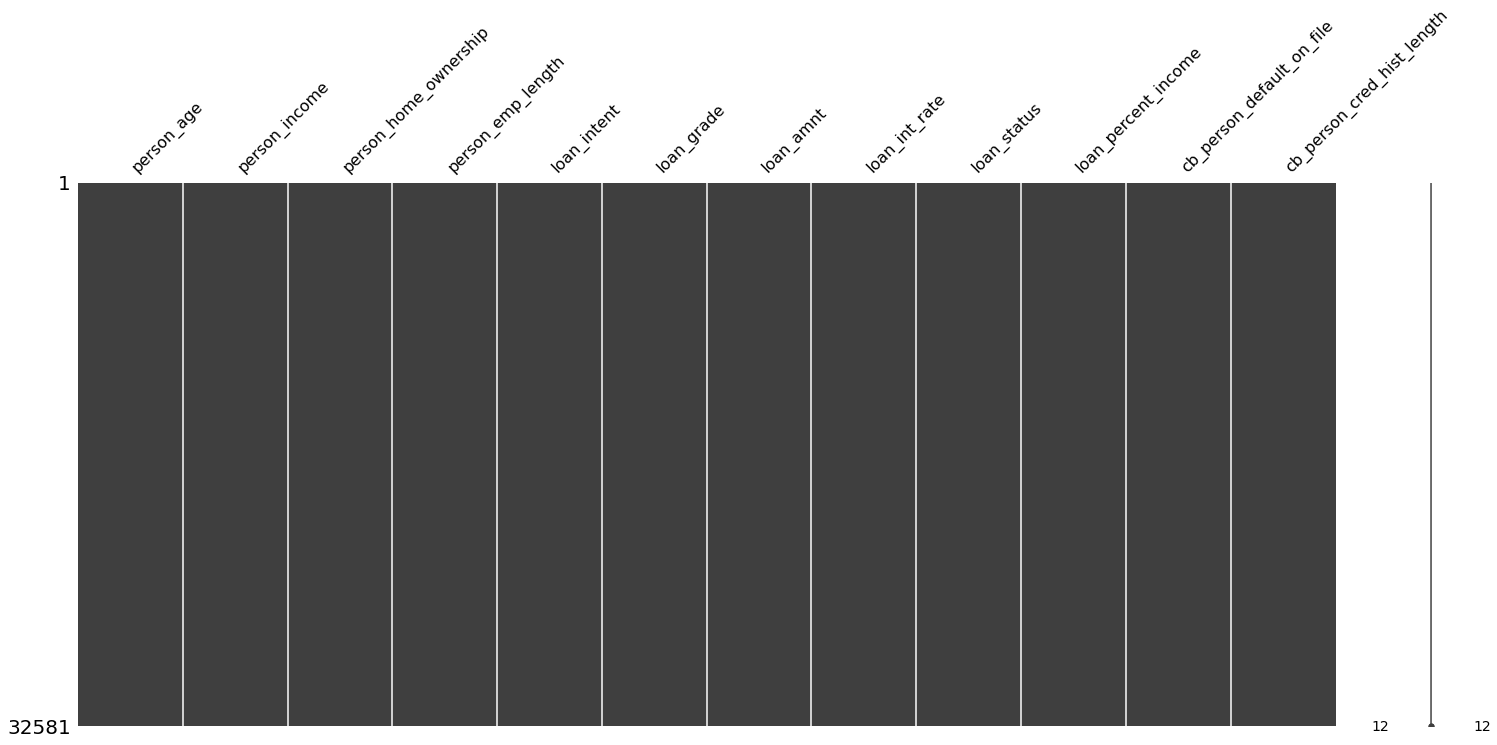

In [46]:
import missingno as msno
msno.matrix(df2)

## Fase 3: Limpieza

In [47]:
df2[df2.dtypes[df2.dtypes== float].index] # filtrar columnas flotantes

,person_emp_length,loan_int_rate,loan_percent_income
0,123.0,16.02,0.59
1,5.0,11.14,0.10
2,1.0,12.87,0.57
3,4.0,15.23,0.53
4,8.0,14.27,0.55
...,...,...,...
32576,1.0,13.16,0.11
32577,4.0,7.49,0.15
32578,3.0,10.99,0.46
32579,5.0,11.48,0.10


In [48]:
df2[df2.dtypes[df2.dtypes== float].index].quantile(0.75)-df2[df2.dtypes[df2.dtypes== float].index].quantile(0.25)

person_emp_length      5.00
loan_int_rate          4.62
loan_percent_income    0.14
dtype: float64

In [49]:
import numpy as np
def imputar_outliers_IQR(df2):
   q1=df2.quantile(0.25)
   q3=df2.quantile(0.75)
   IQR=q3-q1
   upper = df2[~(df2>(q3+1.5*IQR))].max()
   lower = df2[~(df2<(q1-1.5*IQR))].min()
   df = np.where(df2 > upper, 
                 df2.median(),
                 np.where(df2 < lower,
                          df2.median(),
                          df2) 
                 )
   return df2

In [50]:
df2[['person_emp_length','loan_percent_income']]=imputar_outliers_IQR(df2[['person_emp_length','loan_percent_income']])
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Text(0.5, 1.0, 'Titulo')

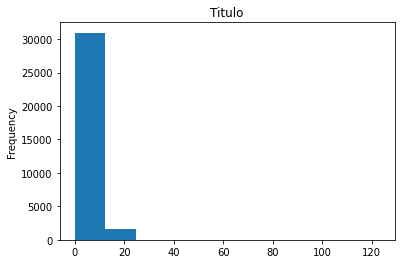

In [51]:
df2['person_emp_length'].plot(kind='hist')
plt.title('Titulo')

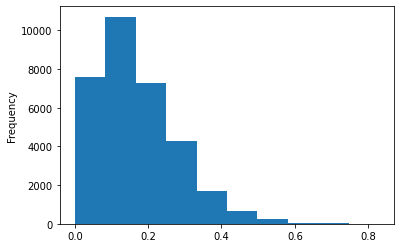

In [52]:
df2['loan_percent_income'].plot(kind='hist')

## Fase 4: Enriquecimiento

In [53]:
!pip install pytrends
df2['person_home_ownership'].unique()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=2fb4b9743c3fe10c197d9585baff7ac350479c02d000abd9e9e7be3a8378ae36
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [54]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ['RENT', 'OWN', 'MORTGAGE']
pytrends.build_payload(keywords, cat=0, geo='AR', gprop='') # Datos de los ultimos 5 años
stop_queries = pytrends.interest_over_time()[keywords]
stop_queries.head()

,RENT,OWN,MORTGAGE
date,,,
2017-11-05,52,28,2
2017-11-12,63,33,2
2017-11-19,49,29,4
2017-11-26,47,28,0
2017-12-03,54,39,5


In [55]:
df_t=stop_queries.groupby(by=stop_queries.index.year).mean().T
df_t.index=df_t.index.rename('person_home_ownership')
df_t

date,2017,2018,2019,2020,2021,2022
person_home_ownership,,,,,,
RENT,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
OWN,33.666667,30.903846,32.019231,34.307692,30.480769,35.720930
MORTGAGE,1.777778,3.634615,8.019231,12.057692,9.846154,5.790698


In [56]:
df_final=pd.merge(left=df2, right=df_t, on='person_home_ownership',how='left')
df_final.head(150)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,2017,2018,2019,2020,2021,2022
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,33.666667,30.903846,32.019231,34.307692,30.480769,35.720930
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.777778,3.634615,8.019231,12.057692,9.846154,5.790698
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,47000,RENT,0.0,HOMEIMPROVEMENT,D,25000,15.28,1,0.53,Y,2,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
146,23,47000,RENT,1.0,VENTURE,E,25000,17.93,1,0.53,N,2,55.111111,51.346154,62.307692,47.230769,56.365385,59.348837
147,23,13200,MORTGAGE,2.0,EDUCATION,B,1400,9.25,0,0.11,N,4,1.777778,3.634615,8.019231,12.057692,9.846154,5.790698
148,21,13200,OWN,0.0,VENTURE,C,4500,12.98,1,0.34,N,4,33.666667,30.903846,32.019231,34.307692,30.480769,35.720930


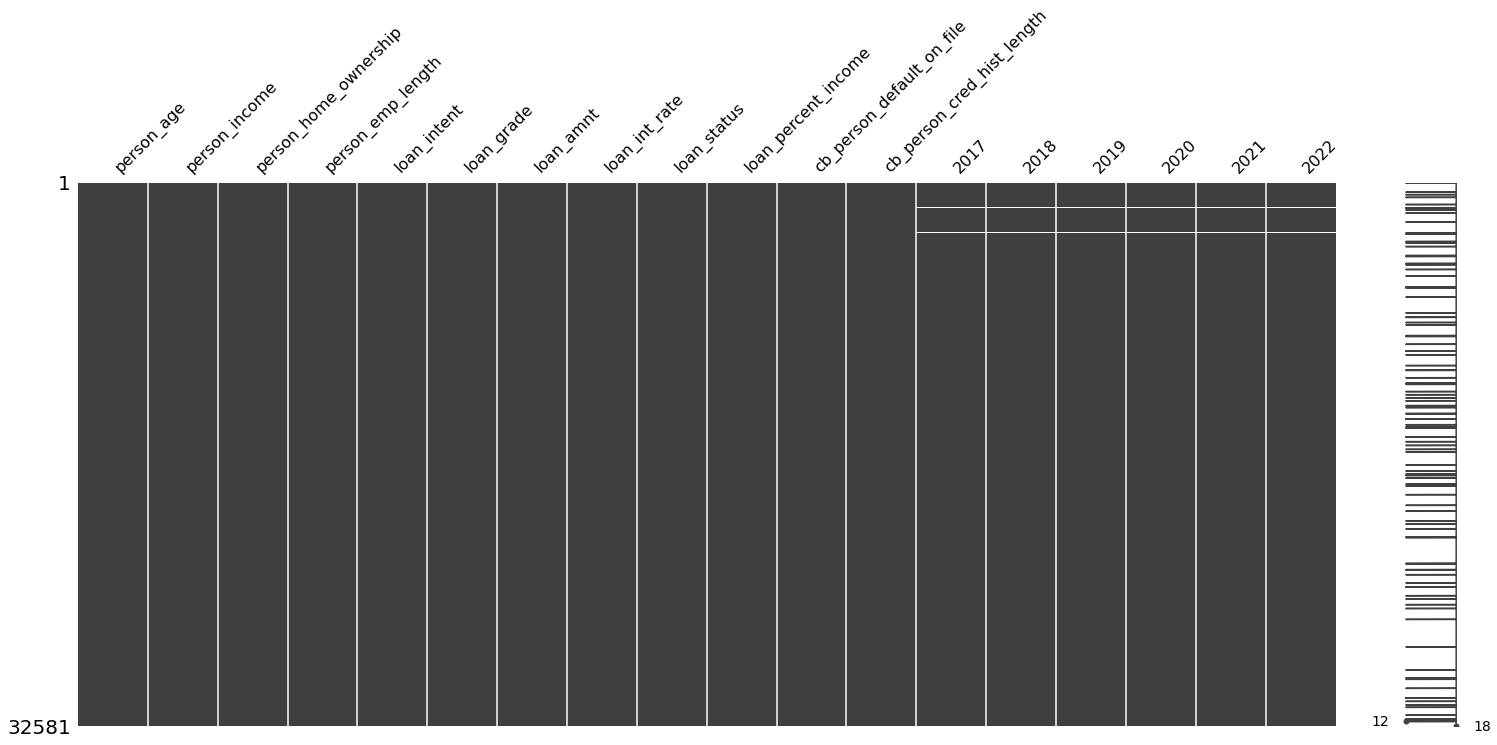

In [57]:
msno.matrix(df_final)

Los espacios en blaco en las ultimas 6 columnas se corresponden a los préstamos de OTHER, termino que no tendría sentido googlear por lo amplio del mismo. De alli que hemos llenado el mismo con un 0.

In [58]:
df_final[2017] = df_final[2017].fillna(0)
df_final[2018] = df_final[2018].fillna(0)
df_final[2019] = df_final[2019].fillna(0)
df_final[2020] = df_final[2020].fillna(0)
df_final[2021] = df_final[2021].fillna(0)
df_final[2022] = df_final[2022].fillna(0)

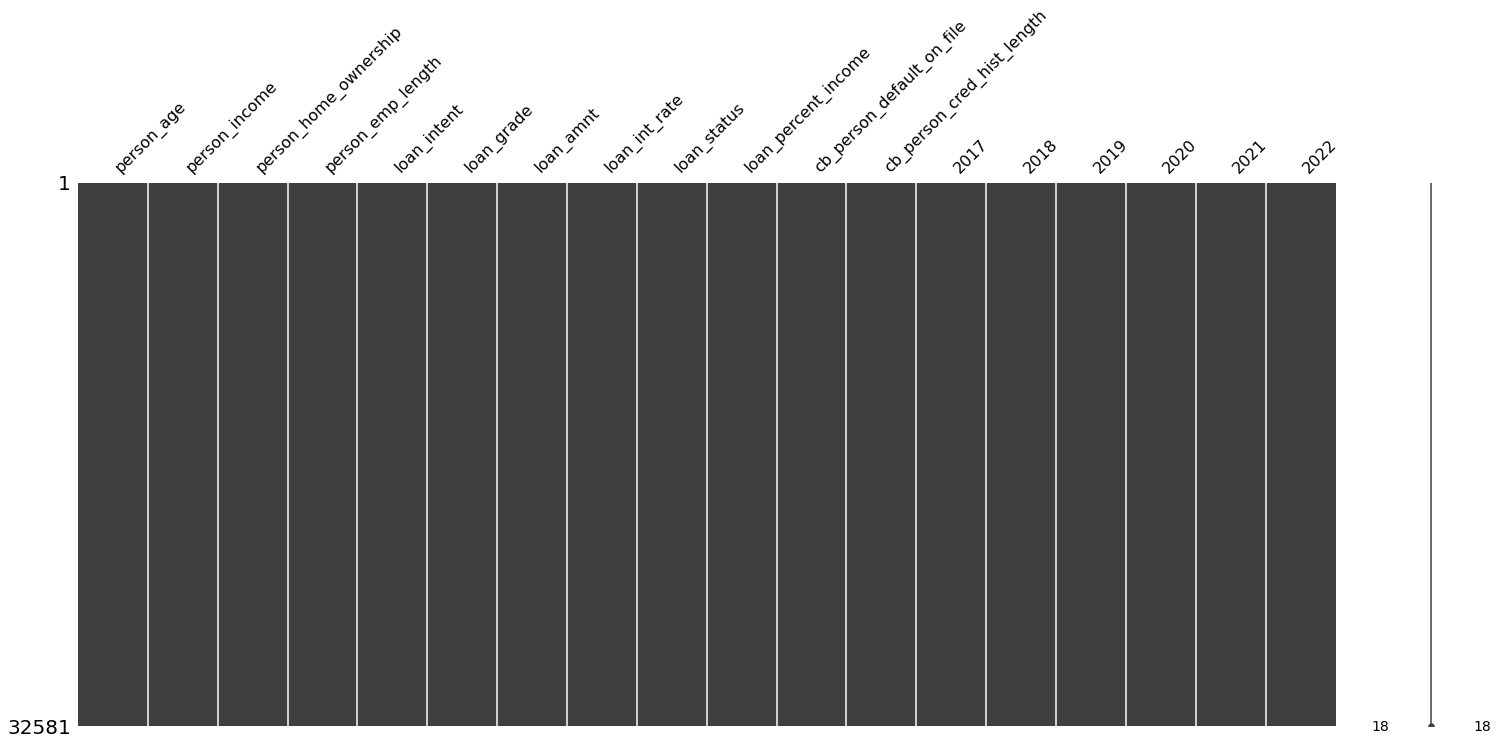

In [59]:
msno.matrix(df_final)

## Storytelling

La finalidad del presente trabajo es encontrar perfil/es de cliente/s cuya probabilidad de default signifiquen un perjuicio para la calidad de la cartera y el P/L del banco, utilizando dicha información para optimizar los modelos de crédito existentes en la entidad. En resumidas cuentas, *determinar si es alguna de las características incluidas en el dataset o alguna combinación de ellas buena para segmentar clientes con adecuado cumplimiento crediticio de aquellos que no lo son*?

Si bien a priori uno podría intuir que el ingreso del solicitante es la variable que mejor segmenta el comportamiento se puede observar del siguiente cuadro que ello no es así, aunque sí existe (como se ve en el segundo gràfico) importante incidencia de malos pagadores por debajo de cierto umbral mínimo de ingresos (en torno a los $19k), lo cual es lógico ya que cualquier persona priorizaría -con un bajo nivel de ingreso- cubrir primeramente otras necesidades, tales como la comida y necesidades bàsicas. 

**En base a lo expuesto, sería recomendable incluir dentro de las políticas de otorgamiento de créditos de la entidad un ingreso mínimo para acceder a asistencia financiera.**

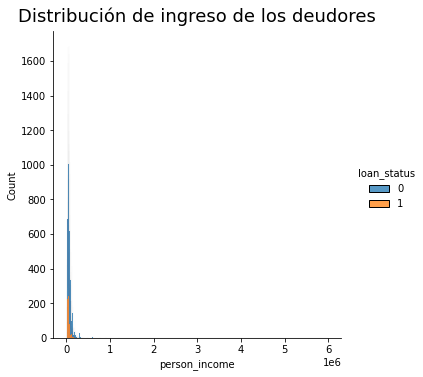

In [78]:
ax=sns.displot(data=df_final, x="person_income", hue="loan_status", multiple="stack")
plt.title("Distribución de ingreso de los deudores", fontsize=18, verticalalignment='bottom');
plt.show()

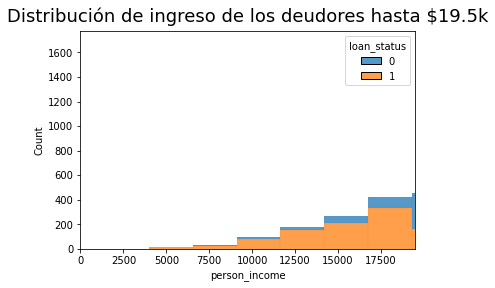

In [79]:
ax=sns.histplot(data=df_final, x="person_income", hue="loan_status", multiple="stack")
ax.set_xlim(0, 19500)
plt.title("Distribución de ingreso de los deudores hasta $19.5k", fontsize=18, verticalalignment='bottom');
plt.show()

Realizamos como segundo paso un histograma de frecuencia en el que claramente puede observarse la **mayor incidencia de los creditos con incumplimiento (loan_status=1) en aquellos creditos cuyo pago absorben màs de aproximadamente el 30% de los ingresos.** 

**Para evitar esa mora incremental será importante que el banco tenga una estricta polìtica en materia de relación cuota/ ingreso al momento de otorgamiento de facilidades de crèdito.**

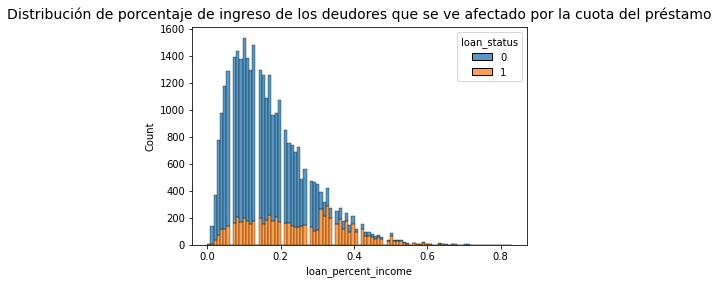

In [80]:
sns.histplot(data=df_final, x="loan_percent_income", hue="loan_status", multiple="stack")
plt.title("Distribución de porcentaje de ingreso de los deudores que se ve afectado por la cuota del préstamo", fontsize=14, verticalalignment='bottom')
plt.show();

Como tercer paso realizamos similar análisis pero reemplazando el porcentaje del ingreso por el monto del crédito solicitado. En este caso, **no parece observarse un rango de valores que concentre mayor cantidad de préstamos con mal cumplimiento.**

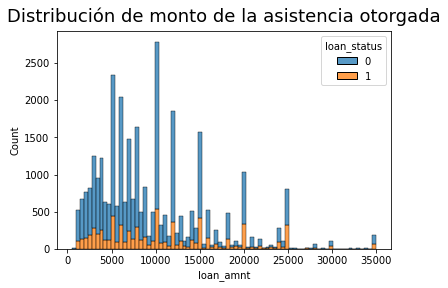

In [81]:
sns.histplot(data=df_final, x="loan_amnt", hue="loan_status", multiple="stack")
plt.title("Distribución de monto de la asistencia otorgada", fontsize=18, verticalalignment='bottom')
plt.show();

En lo que respecta a la tasa de interes se observa que, cuanto mayor es la tasa, es mayor la posibilidad de incumplimiento, mostrandose entre 14% y 17% practicamente la mitad de los mismos con loan_status=1, situación que ocurre con casi todos los prèstamos cuya tasa de interés sea mayor al 17%.

Dado que la tasa de interés no depende exclusivamente de la política de la compañía, no es fácil tomar medidas en base a este parámetro (por caso, la tasa de interés de referencia o el tratarse o no de una refinanciación puede implicar niveles más altos de tasa).

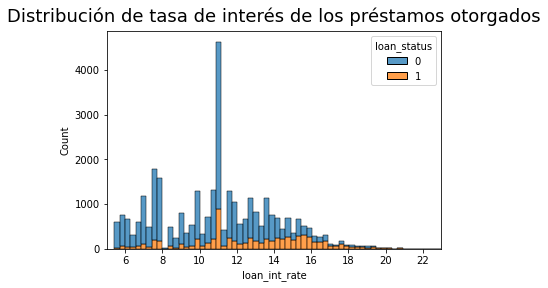

In [82]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(5, 23)
plt.title("Distribución de tasa de interés de los préstamos otorgados", fontsize=18, verticalalignment='bottom');
plt.show()

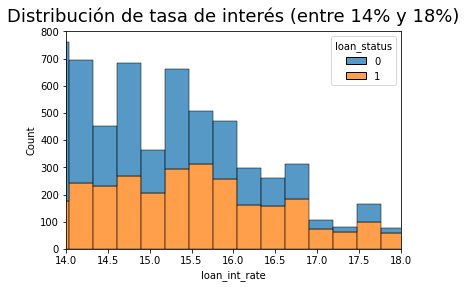

In [83]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(14, 18)
ax.set_ylim(0, 800)
plt.title("Distribución de tasa de interés (entre 14% y 18%)", fontsize=18, verticalalignment='bottom');
plt.show()

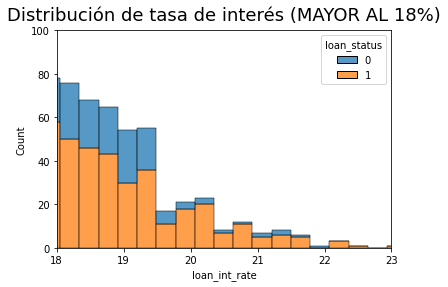

In [86]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(18, 23)
ax.set_ylim(0, 100)
plt.title("Distribución de tasa de interés (MAYOR AL 18%)", fontsize=18, verticalalignment='bottom');
plt.show()

**Para culminar el análisis de las variables numéricas hemos realizado el mismo gráfico para la tasa de interés, la antiguedad laboral, la historia crediticia y la edad; mostrando los resultados (a continuación expuestos) que tampoco nos encontramos ante variables buenas para segmentar clientes con mal character.**

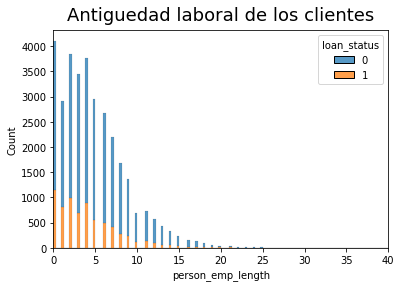

In [87]:
ax=sns.histplot(data=df_final, x="person_emp_length", hue="loan_status", multiple="stack")
ax.set_xlim(0, 40)
plt.title("Antiguedad laboral de los clientes", fontsize=18, verticalalignment='bottom');
plt.show()

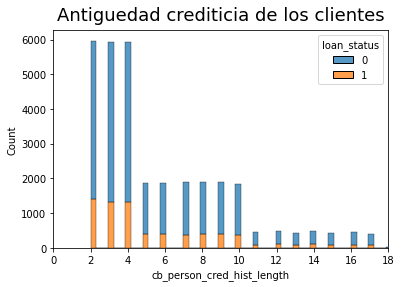

In [89]:
ax=sns.histplot(data=df_final, x="cb_person_cred_hist_length", hue="loan_status", multiple="stack")
ax.set_xlim(0, 18)
plt.title("Antiguedad crediticia de los clientes", fontsize=18, verticalalignment='bottom');
plt.show()

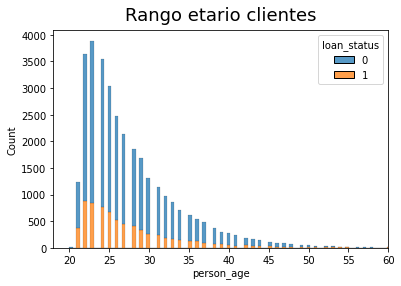

In [91]:
ax=sns.histplot(data=df_final, x="person_age", hue="loan_status", multiple="stack")
ax.set_xlim(18, 60)
plt.title("Rango etario clientes", fontsize=18, verticalalignment='bottom');
plt.show()

Procedemos a continuación a analizar si alguna de las variables cuantitativas permite discriminar medianamente bien a los buenos y malos pagadores. **En primer lugar observamos que el peor segmento de pagadores es el de inquilinos, el cual es a la vez el subsegmento de mayor participación en la cartera total de la entidad. Ello nos podría llevar a pensar la posibilidad de ser más restrictivos en el otorgamiento de créditos a estos últimos, buscando mediante alguna campaña incrementar la participación de dueños o titulares de hipotecas**.

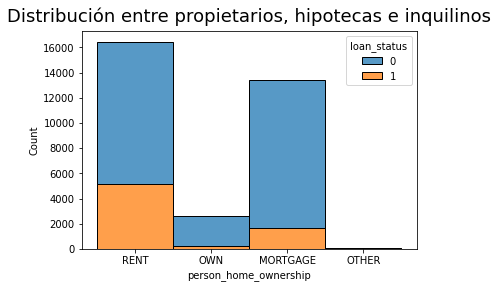

In [92]:
ax=sns.histplot(data=df_final, x="person_home_ownership", hue="loan_status", multiple="stack")
plt.title("Distribución entre propietarios, hipotecas e inquilinos", fontsize=18, verticalalignment='bottom');

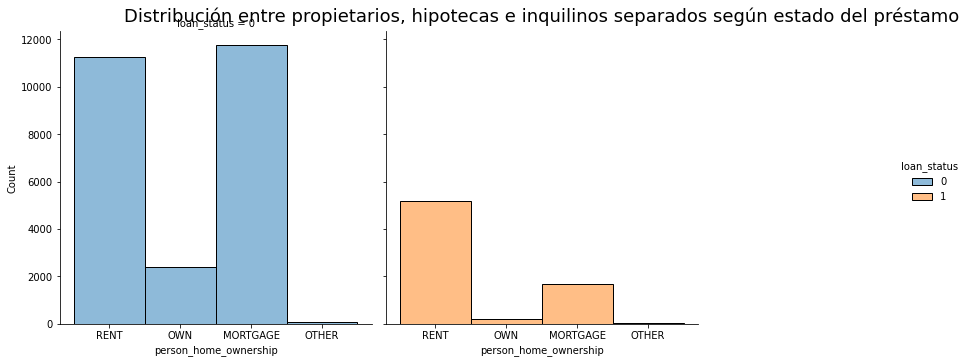

In [99]:
sns.displot(data=df_final, x="person_home_ownership", hue="loan_status", col="loan_status")
plt.title("Distribución entre propietarios, hipotecas e inquilinos separados según estado del préstamo", fontsize=18, verticalalignment='bottom');

Respecto al destino de los préstamos, no resulta clara la supremacía de ninguno de los subgrupos.

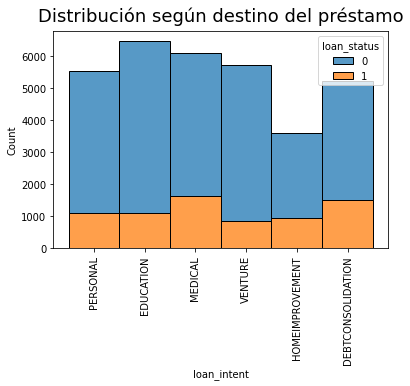

In [98]:
ax=sns.histplot(data=df_final, x="loan_intent", hue="loan_status", multiple="stack")
plt.title("Distribución según destino del préstamo", fontsize=18, verticalalignment='bottom')
plt.xticks(rotation=90);

Por último, respecto a la existencia de antecedentes desfavorables previos, es sustancialmente superior -como la incidencia de los malos pagadores entre 

Text(0.5, 1.0, 'ANTECEDENTES DESFAVORABLES')

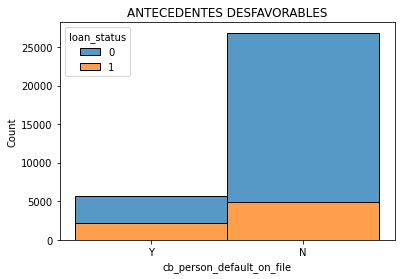

In [75]:
ax=sns.histplot(data=df_final, x="cb_person_default_on_file", hue="loan_status", multiple="stack")
plt.title('ANTECEDENTES DESFAVORABLES')

En resumen, como primer vistazo podemos mencionar que algunas variables que podríamos utilizar para establecer políticas de admisión para clientes de crédito son un nivel mínimo de ingresos, una relación cuota/ ingreso que no supere el 30%, tratar de minimizar la exposición con inquilinos y evitar clientes con antecedentes ya verificados.